In [1]:
%matplotlib inline
from IPython.display import clear_output
import time
from Environments.environments import all_envs, get_all_avail_envs
from Agents.dqn_agent import DQN_Agent
from Agents.ppo_agent import PPO_Agent
# from Agents.ppo_exploration_agent import PPO_Exploration_Agent
from Models import fc, rnn
import matplotlib.pyplot as plt
import torch
import utils
from Curriculum_managers.random_curriculum import Random_Curriculum
import plotly.express as px
import gym
import os
from Agents.agent_utils import ObsWraper, ObsShapeWraper
import numpy as np
import pddlgym.pddlgym as pddlgym

In [2]:
def plot_res(vec, smooth=True):
    if smooth:
        fig = px.line(x=range(len(np.convolve(vec, np.ones(100)/100,mode='valid'))), y=np.convolve(vec, np.ones(100)/100, mode='valid'), title='Train rewards')
    else:
        fig = px.line(x=range(len(vec)), y=vec, title='Train rewards')
    fig.show()

In [3]:
def get_env(env_name, operators_as_actions=False, env_idx=0):
    env = pddlgym.make("PDDLEnv{}-v0".format(env_name.capitalize()), operators_as_actions=operators_as_actions)
    env.fix_problem_index(env_idx)
    obs = env.reset()
    obs_space=(1,)
    env_action_space = env.action_space
    actions = set()
    for i in range(1):
        actions.add(env.sample_action_space(obs))
    num_states = 600000
    setattr(env_action_space, "n", len(env.action_space._all_ground_literals))
    setattr(env, "actions", env.action_space._all_ground_literals)
    setattr(env, "num_states", num_states)
    return env,obs_space, env_action_space.n

In [4]:
device = utils.init_torch()

In [5]:
env, obs_shape, n_actions = get_env("sokoban")
agent = PPO_Agent(obs_shape, n_actions, device=device, batch_size=64, max_mem_size=10**5,num_parallel_envs=64, lr=0.0001 ,model=rnn.RNN)


<OrderEnforcing<PDDLEnv<PDDLEnvSokoban-v0>>>

In [ ]:
train_rewards = agent.train_episodial(env, n_episodes=10000)

In [33]:
env.actions

[move(dir-down:direction),
 move(dir-left:direction),
 move(dir-right:direction),
 move(dir-up:direction)]

In [8]:
# env = gym.envs.make("CartPole-v1")
# n_actions = env.action_space.n
# # obs_shape = env.observation_space.shape
# obs_shape = (1,)

In [9]:
# env = gym.envs.make("CartPole-v1")
# n_actions = env.action_space.n
# obs_shape = env.observation_space.shape

In [10]:
# agent = DQN_Agent(obs_shape, n_actions, device=device, batch_size=64, max_mem_size=10**5, exploration_epsilon=0.3, eps_dec=0, lr=0.001, model=fc.FC)
# agent = DQN_Agent(obs_shape, n_actions, device=device, batch_size=64, max_mem_size=10**5, exploration_epsilon=0.3, num_parallel_envs=64,eps_dec=0, lr=0.001, rnn=True, model=rnn.RNN)

In [11]:
agent = PPO_Agent(obs_shape, n_actions, device=device, batch_size=64, max_mem_size=10**5,num_parallel_envs=64, lr=0.0001 ,model=rnn.RNN)
train_rewards = agent.train_episodial(env, 20000)

episode 0, R:-0142.52, total_steps:8605:   0%|          | 64/20000 [00:04<23:35, 14.08it/s]

In [12]:
plot_res(train_rewards, smooth=False)

In [13]:
agent2 = PPO_Agent(obs_shape, n_actions, device=device, batch_size=64, max_mem_size=10**5,num_parallel_envs=64,exploration_epsilon=0.5, lr=0.0001 ,model=rnn.RNN)
train_rewards2 = agent2.train_episodial(env, 20000)

In [ ]:
# o = env.reset()
# agent.reset_rnn_hidden()

In [19]:
plot_res(train_rewards2, smooth=False)

In [8]:
o = env.reset()

(-1, False)

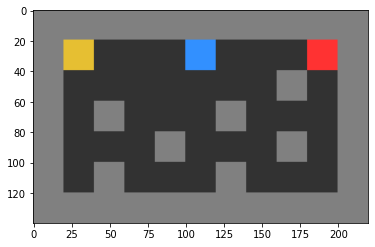

In [20]:
o,r_,done,_ = env.step(5)
x = env.render('rgb_array')
plt.imshow(x)
r_, done

In [27]:
v= agent.pre_process_obs_for_act(o,1)
agent.Q_model(v)


tensor([[-51.3168, -51.4793, -51.3520, -51.5930, -59.9710, -59.6985]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

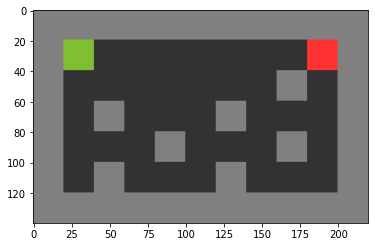

5 4 True
evaluation episode: 0 R: -28


In [14]:
agent.set_eval_mode()
for i in range(1):
    obs = env.reset()
    # break
    R = 0
    t = 0
    while True:
        # Uncomment to watch the behavior in a GUI window
        clear_output(wait=True)
        plt.imshow(env.render('rgb_array'))
        plt.show()
        # env.render(mode='rgb_array')
        # env.render()
        action = agent.act(obs)
        obs, r, done, _ = env.step(action)
        print(action, r, done)

        R += r
        t += 1
        reset = t == 500
        time.sleep(0.05)
        if done or reset:
            break
    print('evaluation episode:', i, 'R:', R)

In [151]:
f = open("prof_log.log", "r")
res = f.readlines()
f.close()

In [ ]:
train_profile = []
for l in res:
    if "message" in l:
        print(l.split('took')[1].split(" ")[2])
        # train_profile.append(float(l.split('took')[1].split(" ")[1]))
        # try:
        train_profile.append(float(l.split('took')[1].split(" ")[2]))
        # except:
            # pass
        

In [175]:
plot_res(train_profile)

In [56]:
plot_res(train_profile)